Importing some stuff

In [1]:
import numpy as np
import cv2
from utility import *
import matplotlib.pyplot as plt
from iced import normalization
from iced import filter
import os
%load_ext autoreload
%autoreload 2

In [2]:
def log(image):
    out = image * 1.
    out[np.where(out <= 0)] = 1
    return np.log(out)

def pearsonII(image):
    out = pearson(image)
    out[np.where(out <= 0)] = 0
    return out

def rel_error(m1 ,m2):
    diff = np.abs(m1 - m2)
    return diff / (np.abs(np.minimum(m1+100, m2+100)))

def print_statistics(m1, text = "", print_results=True):
    max = np.max(m1)
    min = np.min(m1)
    mean = m1.mean()
    median = np.percentile(m1, 50)
    std = m1.std()
    if (print_results):
        print("#-----------------------------------------------------------------------#")
        print("Stats for %s: "% text)
        print("max: %f | min: %f | median: %f | mean: %f | std: %f"%(max, min, median, mean, std))
        print("#-----------------------------------------------------------------------#")
    return max, min, mean, std

def t_test(m1, m2):
    diff = m1 - m2
    n = diff.shape[0] * diff.shape[1]
    std = np.sqrt(np.sum(diff * diff) / (n - 1))
    t0 = diff.mean() * np.sqrt(n) / std
    return t0

def threshold_within_std(m1, k):
    min, max, mean, std = print_statistics(m1, print_results=False)
    return (m1 > mean - k * std) * (m1 < mean + k * std)

Initiating matrices

In [129]:
chr1 = 3
chr2 = chr1
print "chromosome 1: %s, chromosome 2: %s"%(chr1, chr2)
#print observed_mit_original.shape

mit = readMat("../data/extracted_all_contact_MIT/chr_%02d_%02d_500kb.mat"%\
              (chr1, chr2), "\t")
call4 = readMat("../data/extracted_all_contact_call4/chr_%02d_%02d_500kb.mat"%\
                (chr1, chr2), "\t")
rl = readMat("../data/extracted_all_contact_RL/chr_%02d_%02d_500kb.mat"%(chr1, chr2), "\t")

chromosome 1: 3, chromosome 2: 3
file directory: ../data/extracted_all_contact_MIT/chr_03_03_500kb.mat
file directory: ../data/extracted_all_contact_call4/chr_03_03_500kb.mat
file directory: ../data/extracted_all_contact_RL/chr_03_03_500kb.mat


In [130]:
all = readMat("../data/extracted_all_contact_ALL/chr_%02d_%02d_500kb.mat"%(chr1, chr2), "\t")

file directory: ../data/extracted_all_contact_ALL/chr_03_03_500kb.mat


In [131]:
n0, m0 = np.shape(mit)
n1, m1 = np.shape(call4)
n2, m2 = np.shape(rl)
n3, m3 = np.shape(all)

n = np.min([n0, m0, n1, m1, n2, m2, n3, m3])
mit = mit[:n, :n]
call4 = call4[:n, :n]
rl = rl[:n, :n]
all = all[:n, :n]

In [132]:
mit = pearson(scn(normalize(mit)))
call4 = pearson(scn(normalize(call4)))
rl = pearson(scn(normalize(rl)))
print call4.shape

(391, 391)


In [133]:
all = pearson(scn(normalize(rl)))

In [134]:
min, max, mean_mit, std_mit = print_statistics(mit, "mit")
min, max, mean_rl, std_rl = print_statistics(rl, "rl")
min, max, mean_call4, std_call4 = print_statistics(call4, "call4")
min, max, mean_all, std_all = print_statistics(all, "all")

#-----------------------------------------------------------------------#
Stats for mit: 
max: 1.000000 | min: -0.057665 | median: -0.007164 | mean: 0.000825 | std: 0.054108
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for rl: 
max: 1.000000 | min: -0.053589 | median: -0.002150 | mean: 0.000433 | std: 0.050681
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for call4: 
max: 1.000000 | min: -0.032048 | median: -0.002314 | mean: 0.000182 | std: 0.050644
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for all: 
max: 1.000000 | min: -0.081476 | median: -0.002772 | mean: 0.000354 | std: 0.050826
#-----------------------------------------------------------------------#


Number of columnts: 4


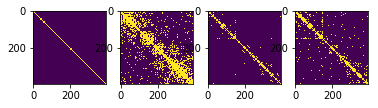

In [135]:
images = [
        (call4) > 0
        , (mit) > 0
        , (rl) > 0
        , (all) > 0
        ]
showImages(images, 1)

Number of columnts: 4


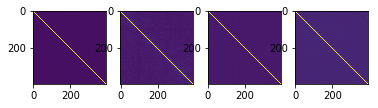

In [136]:
images = [
        np.log(call4+1)
        , np.log(mit+1)
        , np.log(rl+1)
        , np.log(all+1)
        ]
showImages(images, 1)

In [137]:
convertBinaryMatToOrcaReadable(call4 > 0, "data/chr%02d_chr%02d_call4.edges"%(chr1, chr1))
convertBinaryMatToOrcaReadable(mit > 0, "data/chr%02d_chr%02d_mit.edges"%(chr1, chr1))
convertBinaryMatToOrcaReadable(rl > 0, "data/chr%02d_chr%02d_rl.edges"%(chr1, chr1))
convertBinaryMatToOrcaReadable(all > 0, "data/chr%02d_chr%02d_all.edges"%(chr1, chr1))

In [143]:
os.system('Rscript rscript.r %s'%chr1)

0

In [144]:
graphlets_mit = readMat("data/chr%02d_chr%02d_mit.graphlets"%(chr1, chr1), delimiter=" ").astype('uint32')
graphlets_all = readMat("data/chr%02d_chr%02d_all.graphlets"%(chr1, chr1), delimiter=" ").astype('uint32')
graphlets_rl = readMat("data/chr%02d_chr%02d_rl.graphlets"%(chr1, chr1), delimiter=" ").astype('uint32')
graphlets_call4 = readMat("data/chr%02d_chr%02d_call4.graphlets"%(chr1, chr1), delimiter=" ").astype('uint32')
print(graphlets_mit.shape)
print(graphlets_all.shape)
print(graphlets_rl.shape)
print(graphlets_call4.shape)

file directory: data/chr03_chr03_mit.graphlets
file directory: data/chr03_chr03_all.graphlets
file directory: data/chr03_chr03_rl.graphlets
file directory: data/chr03_chr03_call4.graphlets
(391, 73)
(391, 73)
(391, 73)
(391, 73)


In [145]:
mit_all_corr = \
    graphlet_correlational_distance(graphlets_mit, graphlets_all)

In [146]:
mit_mit_corr = \
    graphlet_correlational_distance(graphlets_mit, graphlets_mit)

In [147]:
mit_call4_corr = \
    graphlet_correlational_distance(graphlets_mit, graphlets_call4)

In [148]:
mit_rl_corr = \
    graphlet_correlational_distance(graphlets_mit, graphlets_rl)


Number of columnts: 2


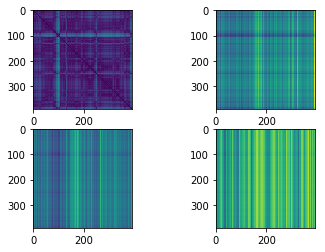

In [149]:
images = [ mit_mit_corr
          , mit_all_corr
         , mit_rl_corr
         , mit_call4_corr]
showImages(images, 2)

In [150]:
print_statistics(mit_mit_corr)
print_statistics(mit_all_corr)
print_statistics(mit_rl_corr)
print_statistics(mit_call4_corr)

#-----------------------------------------------------------------------#
Stats for : 
max: 1.464597 | min: 0.000000 | median: 0.141609 | mean: 0.183276 | std: 0.153546
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for : 
max: 2.207065 | min: 0.658505 | median: 1.365477 | mean: 1.373682 | std: 0.179704
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for : 
max: 4.118116 | min: 1.068633 | median: 2.239338 | mean: 2.288463 | std: 0.298913
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for : 
max: 4.469617 | min: 3.400858 | median: 4.081259 | mean: 4.075095 | std: 0.148007
#-----------------------------------------------------------------------#


(4.469616723064088, 3.4008584941455666, 4.07509450538009, 0.14800683174023457)

In [151]:
print_statistics(np.diagonal(mit_mit_corr))
print_statistics(np.diagonal(mit_all_corr))
print_statistics(np.diagonal(mit_rl_corr))
print_statistics(np.diagonal(mit_call4_corr))

#-----------------------------------------------------------------------#
Stats for : 
max: 0.000000 | min: 0.000000 | median: 0.000000 | mean: 0.000000 | std: 0.000000
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for : 
max: 2.161133 | min: 0.719218 | median: 1.363225 | mean: 1.374714 | std: 0.174143
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for : 
max: 4.117633 | min: 1.410812 | median: 2.243016 | mean: 2.286506 | std: 0.312053
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for : 
max: 4.469550 | min: 3.662796 | median: 4.077379 | mean: 4.075067 | std: 0.147716
#-----------------------------------------------------------------------#


(4.469550226150505, 3.6627957656735335, 4.075067173766815, 0.14771571662588764)

In [152]:
graphlets = {'mit' : graphlets_mit
            , 'all' : graphlets_all
            , 'rl' : graphlets_rl
            , 'call4' : graphlets_call4}
pair_orbits(graphlets, chr1)

shape of graphlet for chromosome 3 of cell rl:                 391 by 73
shape of graphlet for chromosome 3 of cell call4:                 391 by 73
shape of graphlet for chromosome 3 of cell all:                 391 by 73
shape of graphlet for chromosome 3 of cell mit:                 391 by 73
('number of matrices:', 4)
data/chr03_orbit00.paired.csv
data/chr03_orbit01.paired.csv
data/chr03_orbit02.paired.csv
data/chr03_orbit03.paired.csv
data/chr03_orbit04.paired.csv
data/chr03_orbit05.paired.csv
data/chr03_orbit06.paired.csv
data/chr03_orbit07.paired.csv
data/chr03_orbit08.paired.csv
data/chr03_orbit09.paired.csv
data/chr03_orbit10.paired.csv
data/chr03_orbit11.paired.csv
data/chr03_orbit12.paired.csv
data/chr03_orbit13.paired.csv
data/chr03_orbit14.paired.csv
data/chr03_orbit15.paired.csv
data/chr03_orbit16.paired.csv
data/chr03_orbit17.paired.csv
data/chr03_orbit18.paired.csv
data/chr03_orbit19.paired.csv
data/chr03_orbit20.paired.csv
data/chr03_orbit21.paired.csv
data/chr03_orbit

In [153]:
for orbit in range(73):
    file_name = "data/chr%02d_orbit%02d.paired.csv"%(chr1, orbit)
    command = "java -jar mine.jar %s -allPairs"%file_name
    os.system(command)

In [154]:
pairwise_hic = {}
for key in graphlets:
    pairwise_hic = {}
    for key in graphlets:
        pairwise_hic[key] = {}
for orbit in range(73):
    var1, var2, mic = get_mic_from_file\
        ("data/chr%02d_orbit%02d.paired.csv,allpairs,cv=0.0,B=n^0.6,Results.csv"\
         %(chr1, orbit))
    n = len(var1)
    for i in range(n):
        pairwise_hic[var1[i]][var2[i]] = mic[i]
        pairwise_hic[var2[i]][var1[i]] = mic[i]

data/chr03_orbit00.paired.csv,allpairs,cv=0.0,B=n^0.6,Results.csv
data/chr03_orbit01.paired.csv,allpairs,cv=0.0,B=n^0.6,Results.csv
data/chr03_orbit02.paired.csv,allpairs,cv=0.0,B=n^0.6,Results.csv
data/chr03_orbit03.paired.csv,allpairs,cv=0.0,B=n^0.6,Results.csv
data/chr03_orbit04.paired.csv,allpairs,cv=0.0,B=n^0.6,Results.csv
data/chr03_orbit05.paired.csv,allpairs,cv=0.0,B=n^0.6,Results.csv
data/chr03_orbit06.paired.csv,allpairs,cv=0.0,B=n^0.6,Results.csv
data/chr03_orbit07.paired.csv,allpairs,cv=0.0,B=n^0.6,Results.csv
data/chr03_orbit08.paired.csv,allpairs,cv=0.0,B=n^0.6,Results.csv
data/chr03_orbit09.paired.csv,allpairs,cv=0.0,B=n^0.6,Results.csv
data/chr03_orbit10.paired.csv,allpairs,cv=0.0,B=n^0.6,Results.csv
data/chr03_orbit11.paired.csv,allpairs,cv=0.0,B=n^0.6,Results.csv
data/chr03_orbit12.paired.csv,allpairs,cv=0.0,B=n^0.6,Results.csv
data/chr03_orbit13.paired.csv,allpairs,cv=0.0,B=n^0.6,Results.csv
data/chr03_orbit14.paired.csv,allpairs,cv=0.0,B=n^0.6,Results.csv
data/chr03

In [155]:
pairwise_hic

{'all': {'call4': '0.13535', 'mit': '0.25577', 'rl': '0.48355'},
 'call4': {'all': '0.13535', 'mit': '0.15115', 'rl': '0.12401'},
 'mit': {'all': '0.25577', 'call4': '0.15115', 'rl': '0.31738'},
 'rl': {'all': '0.48355', 'call4': '0.12401', 'mit': '0.31738'}}